# Univariate/Simple Linear Regression

In this notebook we will build a univariate/simple linear regression model, which will map the single input feature $x$ to output/target variable $y$.

## Outline

- [1 - Packages](#1)

- [2 - Dataset](#2)

- [3 - Univariate Linear Regression Model Using Gradient Descent](#3)
    - [3.1 Custom Model GD](#3point1)
    - [3.2 Sklearn Model GD](#3point2)

- [4 - Univariate Linear Regression Model Using Normal Equation](#4)
    - [4.1 Custom Model NE](#4point1)
    - [4.2 Sklearn Model NE](#4point2)

<a id="1"></a>
## 1 - Packages

Below are the packages/libraries that we are going to use in this notebook.

In [4]:
# Importing necessary packages/libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gd_regression_model import GDRegression
from sklearn.linear_model import SGDRegressor, LinearRegression

<a id="2"></a>
## 2 - Dataset

We will going to use univariate dataset from [Kaggle](https://www.kaggle.com/datasets/andonians/random-linear-regression).

The dataset is downloaded and stored in `univariate_lr_dataset` folder. The folder contains two CSV files **train.csv** and **test.csv**, we will train our model using **train.csv** file and then test our model using **test.csv** file.

Let's first load the datasets into pandas dataframe and visualize it.

In [5]:
# Loading training and testing datasets
train_data = pd.read_csv("univariate_lr_dataset/train.csv")
test_data = pd.read_csv("univariate_lr_dataset/test.csv")

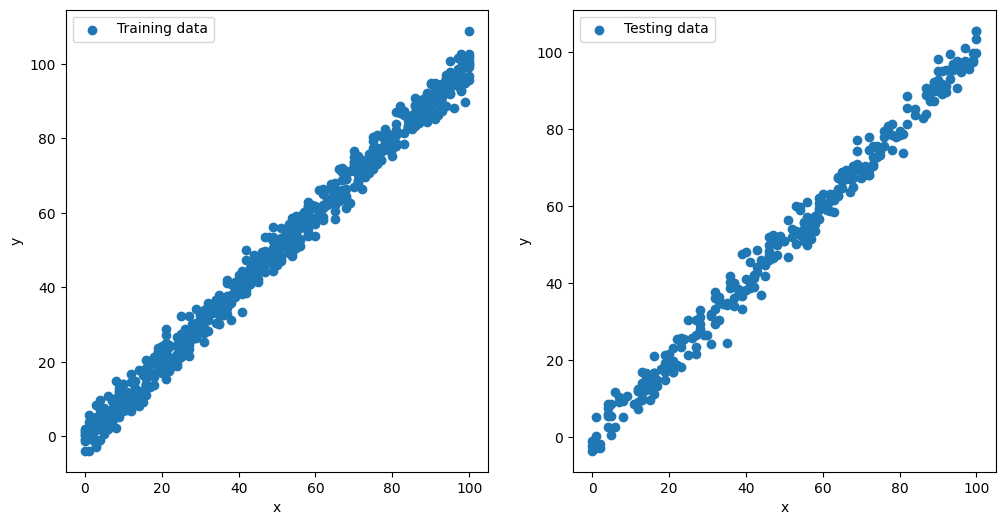

In [6]:
# Visualizing the datasets
_, axes = plt.subplots(1, 2, figsize=(12, 6))
for i, data in enumerate([train_data, test_data]):
    axes[i].scatter(data["x"], data["y"], label="Training data" if i == 0 else "Testing data")
    axes[i].set_xlabel("x")
    axes[i].set_ylabel("y")
    axes[i].legend()

As we can see in the plots above that the feature $x$ has a linear relationship with target $y$, which makes it suitable for our goal of building a univariate linear regression model.

<a id="3"></a>
## 3 - Univariate Linear Regression Model Using Gradient Descent

<a id="3point1"></a>
### 3.1 Custom Model GD

We will first build our own custom univariate linear regression model GD using Numpy, and then we will make use of Scikit-Learn library. And also we will going to use vectorized approach for efficient implementation.

The univariate linear regression model can be represented as:

$$ \hat{Y} = f(X) = X \cdot W + B \tag{1} $$

where,
- $\hat{Y}$ is a prediction matrix.
- $X$ is a input feature matrix.
- $W$ is a weight matrix.
- $B$ is a bias matrix.

The cost function for our model will be Mean Squared Error (MSE):

$$ C = J(W, B) = \frac{\sum(\hat{Y} - Y)^2}{m} \tag{2} $$

where,
- $Y$ is a target variable matrix.
- $m$ is the number of training examples.

And we will train our model using gradient descent:

$$ W = W - \alpha * \frac{\partial J(W, B)}{\partial W} \tag{3} $$
$$ B = B - \alpha * \frac{\partial J(W, B)}{\partial B} \tag{4} $$

where,
$$ \frac{\partial J(W, B)}{\partial W}  = \frac{2}{m} * X^{T} \cdot (\hat{Y} - Y) \tag{5} $$
$$ \frac{\partial J(W, B)}{\partial B}  = \frac{2}{m} * \sum(\hat{Y} - Y) \tag{6} $$

_**NOTE:** All the code implementation of the above is in `gd_regression_model.py` file_.

Let's convert the data from pandas dataframe into numpy arrays.

In [7]:
# Converting data from pandas dataframe into numpy arrays
X_train, X_test = train_data["x"].to_numpy().reshape(-1, 1), test_data["x"].to_numpy().reshape(-1, 1)
Y_train, Y_test = train_data["y"].to_numpy().reshape(-1, 1), test_data["y"].to_numpy().reshape(-1, 1)

print(f"Shape of X_train: {X_train.shape} & Shape of Y_train: {Y_train.shape}\n")
print(f"Shape of X_test: {X_test.shape} & Shape of Y_test: {Y_test.shape}")

Shape of X_train: (700, 1) & Shape of Y_train: (700, 1)

Shape of X_test: (300, 1) & Shape of Y_test: (300, 1)


We have **700** training examples that we our going to use for training our model. Let's now initialize and train our model. 

In [8]:
# Initializing the custom model gd and training it for 1000 iterations
c_model = GDRegression(iterations=1000, alpha=0.0001)
c_model.fit(X_train, Y_train)

Iteration: 1/1000
Cost: 3336.6524577344967

Iteration: 2/1000
Cost: 376.42759527615004

Iteration: 3/1000
Cost: 48.6946083210749

Iteration: 4/1000
Cost: 12.410570180956404

Iteration: 5/1000
Cost: 8.393484336445717

Iteration: 6/1000
Cost: 7.948743544785674

Iteration: 7/1000
Cost: 7.899504908423314

Iteration: 8/1000
Cost: 7.894053183084634

Iteration: 9/1000
Cost: 7.893449202734694

Iteration: 10/1000
Cost: 7.893381926904867

Iteration: 11/1000
Cost: 7.893374070850392

Iteration: 12/1000
Cost: 7.893372793330447

Iteration: 13/1000
Cost: 7.893372244175371

Iteration: 14/1000
Cost: 7.893371775700042

Iteration: 15/1000
Cost: 7.893371316197823

Iteration: 16/1000
Cost: 7.893370857729907

Iteration: 17/1000
Cost: 7.893370399417366

Iteration: 18/1000
Cost: 7.89336994116289

Iteration: 19/1000
Cost: 7.893369482955699

Iteration: 20/1000
Cost: 7.8933690247946

Iteration: 21/1000
Cost: 7.893368566679452

Iteration: 22/1000
Cost: 7.8933681086102405

Iteration: 23/1000
Cost: 7.89336765058695

Text(0, 0.5, 'Cost')

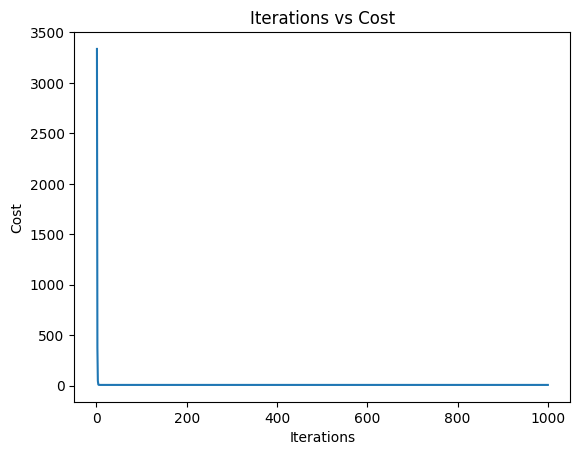

In [9]:
# Plotting the training history of the model
history = np.array(c_model.history)

plt.plot(history[:, 0], history[:, 1])
plt.title("Iterations vs Cost")
plt.xlabel("Iterations")
plt.ylabel("Cost")

As we can see in the above plot that cost has been minimized, thus resulting in optimal parameters for the model. Now we are ready to make prediction.

In [10]:
# Making predication on testing data and computing the cost
Y_hat_test = c_model.make_prediction(X_test)

cost = c_model.compute_cost(Y_hat_test, Y_test)
print(f"Cost: {cost}")

Cost: 9.459867311358613


The test cost is near to training cost. Now let's visualize our fitted model on both training and testing datasets.

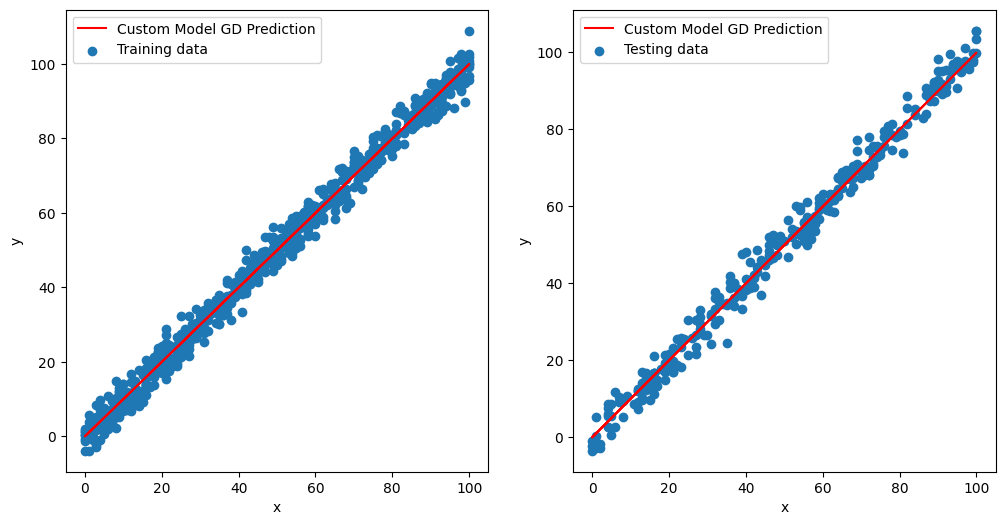

In [11]:
# Visualizing the datasets with custom model gd predictions
_, axes = plt.subplots(1, 2, figsize=(12, 6))
for i, data in enumerate([train_data, test_data]):
    axes[i].plot(
        data["x"], 
        c_model.make_prediction(X_train) if i == 0 else c_model.make_prediction(X_test),
        label="Custom Model GD Prediction",
        c="r"
    )
    axes[i].scatter(data["x"], data["y"], label="Training data" if i == 0 else "Testing data")
    axes[i].set_xlabel("x")
    axes[i].set_ylabel("y")
    axes[i].legend()

By looking at the above plots we can now mark our goal of building a **custom univariate linear regression model using gradient descent** as completed.

<a id="3point2"></a>
### 3.2 Sklearn Model GD

Now we are going to use Scikit-Learn library to build **univariate linear regression model using gradient descent**.

In [18]:
# Initializing and training SGDRegressor model from Scikit-Learn
sgd_reg_model = SGDRegressor(eta0=0.001, penalty=None, random_state=42)
sgd_reg_model.fit(X_train, Y_train.ravel())

SGDRegressor(eta0=0.001, penalty=None, random_state=42)

In [19]:
# Making predication on testing data and computing the cost
Y_hat_test_ = sgd_reg_model.predict(X_test).reshape(-1, 1)

cost_ = c_model.compute_cost(Y_hat_test_, Y_test)
print(f"Cost: {cost_}")

Cost: 9.833349950244719


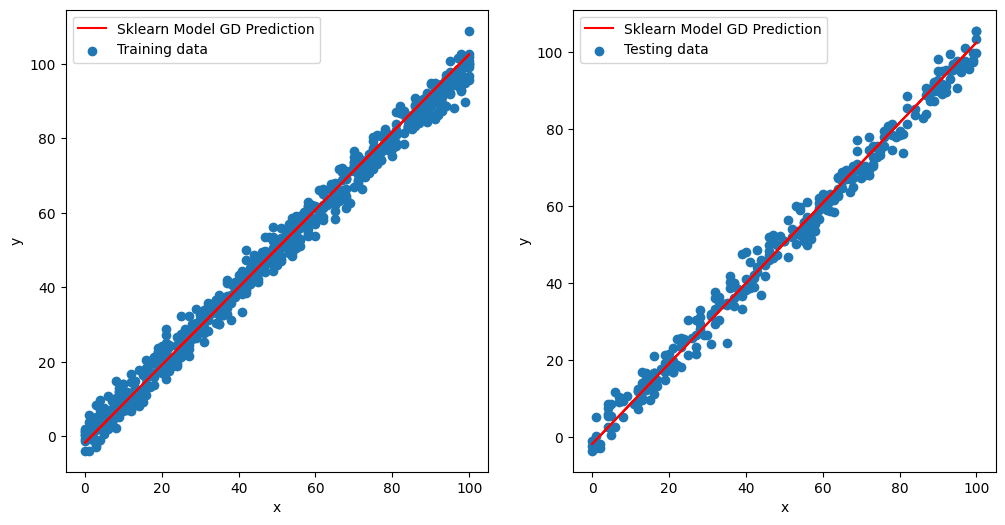

In [20]:
# Visualizing the datasets with sklearn model gd predictions
_, axes = plt.subplots(1, 2, figsize=(12, 6))
for i, data in enumerate([train_data, test_data]):
    axes[i].plot(
        data["x"], 
        sgd_reg_model.predict(X_train) if i == 0 else sgd_reg_model.predict(X_test),
        label="Sklearn Model GD Prediction",
        c="r"
    )
    axes[i].scatter(data["x"], data["y"], label="Training data" if i == 0 else "Testing data")
    axes[i].set_xlabel("x")
    axes[i].set_ylabel("y")
    axes[i].legend()

Both the Custom model and Scikit-Learn model has achieved identical results on both datasets, marking the completion of **Univariate Linear Regression Model Using Gradient Descent**.

<a id="4"></a>
## 4 - Univariate Linear Regression Model Using Normal Equation

<a id="4point1"></a>
### 4.1 Custom Model NE

Just like previous one we will first build our own custom univariate linear regression model NE using Numpy, and then we will make use of Scikit-Learn library.

We only have to implement the below equation in code to find the parameters for our model:

$$ W = (X^T \cdot X)^{-1} \cdot X^T \cdot Y \tag{1} $$

where,
- $W$ is a model parameters matrix.
- $X$ is a input feature matrix.
- $Y$ is a target variable matrix.

_**NOTE:** Solving regression problem using normal equation requires the bias term to be included in weight matrix. Therefore we also have to add 1's column vector to our original feature datasets, so the dimensions should be matched during matrix multiplication._

In [21]:
# Adding 1's column vector to feature datasets
X_train_ = np.hstack((X_train, np.ones_like(X_train)))
X_test_ = np.hstack((X_test, np.ones_like(X_test)))

print(f"Shape of X_train_: {X_train_.shape} & Shape of X_test_: {X_test_.shape}")

Shape of X_train_: (700, 2) & Shape of X_test_: (300, 2)


In [22]:
# Finding the optimal parameters using normal equation method
W = np.linalg.inv(X_train_.T @ X_train_) @ (X_train_.T @ Y_train)
print(f"Optimal parameters:\n {W}")

Optimal parameters:
 [[ 1.00077825]
 [-0.12015553]]


In [23]:
# Making predication on testing data and computing the cost
print(f"Cost: {c_model.compute_cost((X_test_ @ W), Y_test)}")

Cost: 9.434852832251444


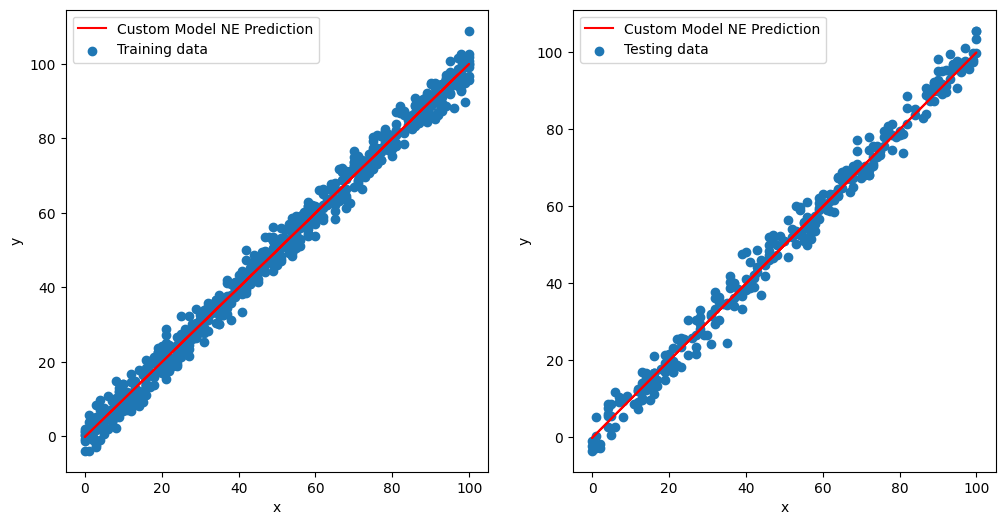

In [24]:
# Visualizing the datasets with custom model ne predictions
_, axes = plt.subplots(1, 2, figsize=(12, 6))
for i, data in enumerate([train_data, test_data]):
    axes[i].plot(
        data["x"], 
        (X_train_ @ W) if i == 0 else (X_test_ @ W),
        label="Custom Model NE Prediction",
        c="r"
    )
    axes[i].scatter(data["x"], data["y"], label="Training data" if i == 0 else "Testing data")
    axes[i].set_xlabel("x")
    axes[i].set_ylabel("y")
    axes[i].legend()

The results match with the gradient descent trained model, but with much less implementation.

<a id="4point2"></a>
### 4.2 Sklearn Model NE

Now we are going to use Scikit-Learn library to build **univariate linear regression model using normal equation**.

In [25]:
# Initializing and training LinearRegression model from Scikit-Learn
linear_reg_model = LinearRegression(fit_intercept=False)
linear_reg_model.fit(X_train_, Y_train)

LinearRegression(fit_intercept=False)

In [26]:
# Making predication on testing data and computing the cost
print(f"Cost: {c_model.compute_cost(linear_reg_model.predict(X_test_), Y_test)}")

Cost: 9.434852832251448


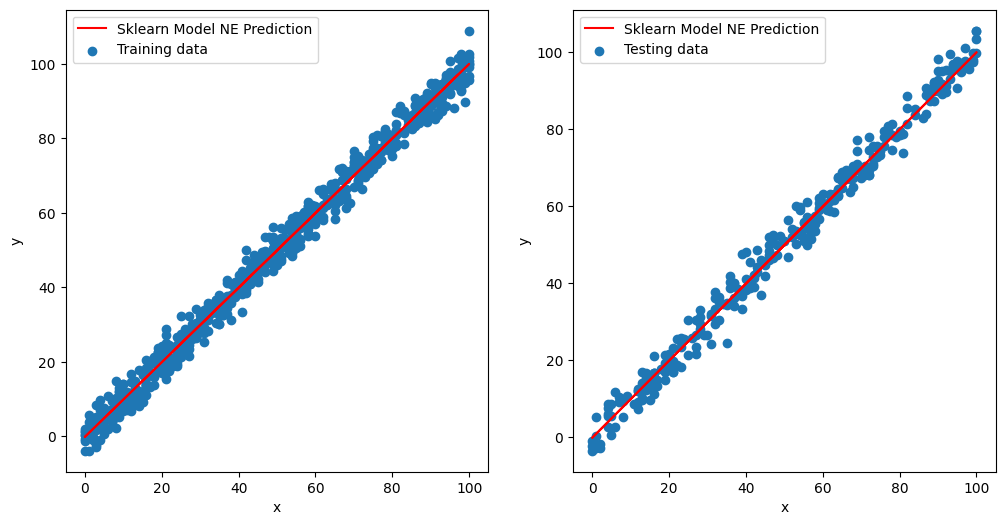

In [27]:
# Visualizing the datasets with sklearn model ne predictions
_, axes = plt.subplots(1, 2, figsize=(12, 6))
for i, data in enumerate([train_data, test_data]):
    axes[i].plot(
        data["x"], 
        linear_reg_model.predict(X_train_) if i == 0 else linear_reg_model.predict(X_test_),
        label="Sklearn Model NE Prediction",
        c="r"
    )
    axes[i].scatter(data["x"], data["y"], label="Training data" if i == 0 else "Testing data")
    axes[i].set_xlabel("x")
    axes[i].set_ylabel("y")
    axes[i].legend()

Same as gradient descent based case, both the Custom model and Scikit-Learn model has achieved identical results on both datasets, marking the completion of **Univariate Linear Regression Model Using Normal Equation**.